# DATA 643: Recommender Systems
Final Project:  Book Crossing RecSys | Walt Wells, Summer 2017

# Notebook P2 - Data Preparation

# Environment Prep

In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(stringr))
suppressMessages(library(Matrix))
suppressMessages(library(recommenderlab))
suppressMessages(library(ggplot2))
source('helper.R')

# Data Prep

In [2]:
#rawBook <- read.csv('~/CUNY_DATA_643/FinalProject/BX-CSV-Dump/BX-Book-Ratings.csv', sep = ';')
#indexBook <- read.csv('~/CUNY_DATA_643/FinalProject/BX-CSV-Dump/BX-Books.csv', sep = ';')

# These were used as intermediary steps during the prep phase
#saveRDS(rawBook, 'rawBook.rds')
#saveRDS(indexBook, 'indexBook.rds')
#rm(rawBook, indexBook)

In [3]:
rawBook <- readRDS('rawBook.rds')
indexBook <- readRDS("indexBook.rds")

In [4]:
str(rawBook)
head(rawBook)
head(indexBook)

'data.frame':	493813 obs. of  3 variables:
 $ User.ID    : int  276725 276726 276727 276729 276729 276733 276736 276737 276744 276745 ...
 $ ISBN       : Factor w/ 204680 levels " 0330299891",..: 35318 18174 69599 83091 83104 175647 179196 97576 53592 180508 ...
 $ Book.Rating: int  0 5 0 3 6 0 8 6 7 10 ...


User.ID,ISBN,Book.Rating
276725,034545104X,0
276726,0155061224,5
276727,0446520802,0
276729,052165615X,3
276729,0521795028,6
276733,2080674722,0


ISBN,Book.Title,Book.Author,Year.Of.Publication,Publisher,Image.URL.S,Image.URL.M,Image.URL.L
0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg


### Remove 0s

From the data page - "Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0."

However, not all ratings and users have a 0.   We will remove these rows, as when constructed as a binarized utility matrix later, they will all become 0s again (along with the NAs)

In [5]:
table(rawBook$Book.Rating)
rawBook <- rawBook[!rawBook$Book.Rating ==0, ]
table(rawBook$Book.Rating)


     0      1      2      3      4      5      6      7      8      9     10 
317794    658   1184   2622   3802  21546  15222  31300  42046  26549  31090 


    1     2     3     4     5     6     7     8     9    10 
  658  1184  2622  3802 21546 15222 31300 42046 26549 31090 

### Clean Up ISBN Field

There is some noisy punctuation left over in the ISBN field.   Let's remove it in both our datasets. 

In [6]:
cleanISBN <- function(vec) {
    # takes a vector, performs string transformation on it
    newvec <- str_replace_all(as.character(vec),"[[:punct:]]","")
    newvec <- str_replace_all(as.character(newvec),"[+|=|`]","")
    #newvec <- gsub(" ", "", newvec)
    str_trim(newvec)
}
rawBook$ISBN <- cleanISBN(rawBook$ISBN)
indexBook$ISBN <- cleanISBN(indexBook$ISBN)

saveRDS(indexBook, 'indexBook.rds')

## deal with ISBN Outliers
rawBook <- subset(rawBook, !(ISBN == "(THEWINDMILLP"))

## Factorize
rawBook$ISBN <- as.factor(rawBook$ISBN)
rawBook$User.ID <- as.factor(rawBook$User.ID)
str(rawBook)

'data.frame':	176019 obs. of  3 variables:
 $ User.ID    : Factor w/ 33095 levels "8","9","10","12",..: 32471 32472 32472 32473 32474 32475 32476 32477 32477 32477 ...
 $ ISBN       : Factor w/ 95795 levels "0 671 74251 5",..: 9105 38383 38391 82655 44529 24566 83268 2177 46856 50240 ...
 $ Book.Rating: int  5 3 6 8 6 7 10 9 9 8 ...


### Store as Sparse Matrix

We're just going to rename our users sequentially, since we won't be using the user content data.  

In [7]:
BookSparse <- sparseMatrix(i = as.integer(rawBook$User.ID),
                           j = as.integer(rawBook$ISBN),
                           x = rawBook$Book.Rating)

colnames(BookSparse) <- levels(rawBook$ISBN)
rownames(BookSparse) <- 1:nlevels(rawBook$User.ID)

### Save as Recommender Lab Objects

We'll save two objects to import in our modelling notebook.   One with explicit and one with implicit ratings. 

In [8]:
BookM <- new("realRatingMatrix", data=BookSparse)

BinBookM <- new('binaryRatingMatrix', binarize(BookM, minRating=1))

### Normalize

In [9]:
BookM <- normalize(BookM, method="center")

### Review Object Sizes

Using function defined in helper.R

In [10]:
getSizeDim(rawBook)
getSizeDim(BookSparse)
getSizeDim(BookM)
getSizeDim(BinBookM)
getSizeDim(indexBook)

[1] "Object rawBook size: 21.212 MB |  Dim: 176019 3"
[1] "Object BookSparse size: 20.905 MB |  Dim: 33095 95795"
[1] "Object BookM size: 22.927 MB |  Dim: 33095 95795"
[1] "Object BinBookM size: 19.326 MB |  Dim: 33095 95795"
[1] "Object indexBook size: 101.42 MB |  Dim: 115253 8"


### Review if any books or users are not represented

In [11]:
test <- BookM[rowCounts(BookM) > 0, colCounts(BookM) > 0]
test
BookM
BinBookM

33095 x 95795 rating matrix of class ‘realRatingMatrix’ with 176017 ratings.
Normalized using center on rows.

33095 x 95795 rating matrix of class ‘realRatingMatrix’ with 176017 ratings.
Normalized using center on rows.

33095 x 95795 rating matrix of class ‘binaryRatingMatrix’ with 176017 ratings.

### Initial Data Exploration

Let's review some summary stats on the book ratings.   

In [12]:
bookMeans <- colMeans(BookM)
quantile(bookMeans)

0%        25%        50%        75%       100% 
-8.3647059 -0.6730725  0.0000000  0.6845446  5.6896552

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


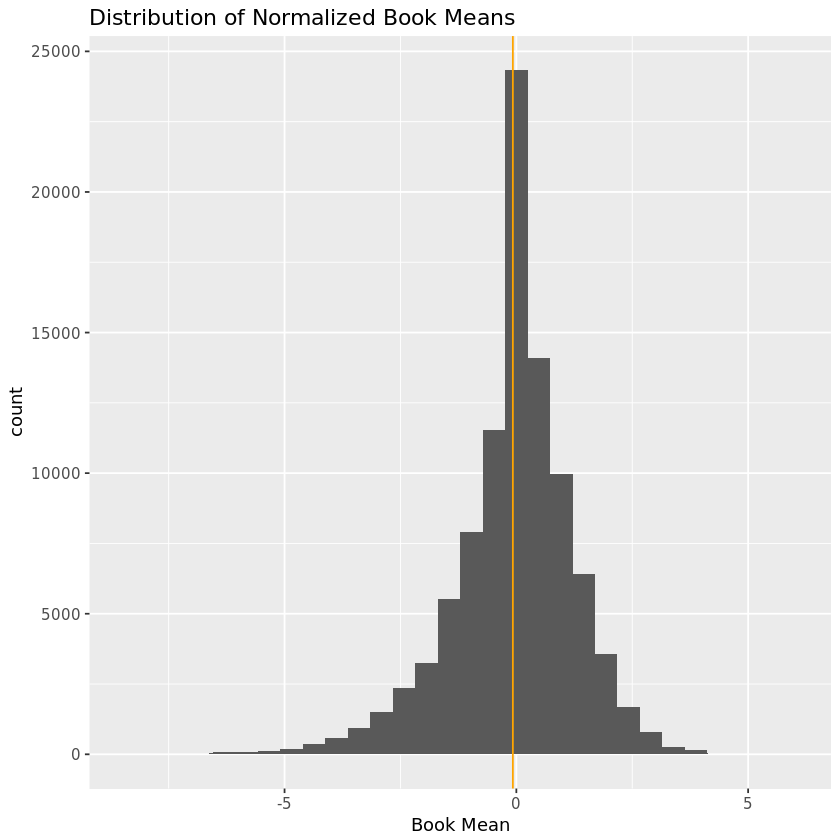

In [13]:
qplot(bookMeans) + 
    stat_bin(binwidth=.25) + 
    geom_vline(xintercept = mean(bookMeans), col='orange') + 
    ggtitle("Distribution of Normalized Book Means") + 
    xlab("Book Mean")

## HeatMaps

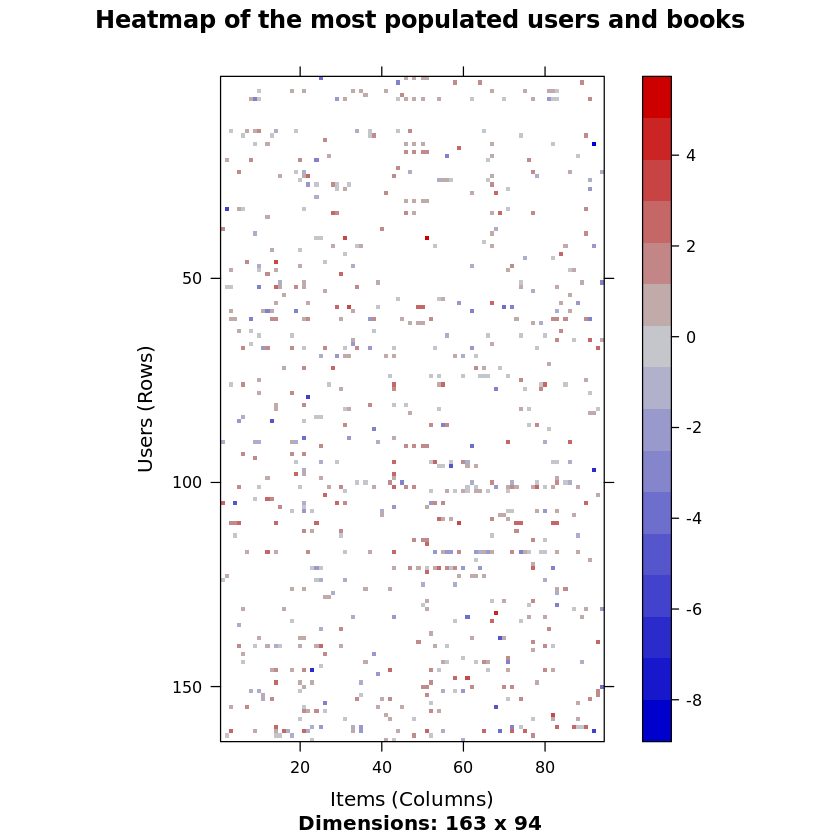

In [14]:
min_books <- quantile(rowCounts(BookM), 0.995)
min_users <- quantile(colCounts(BookM), 0.999)
image(BookM[rowCounts(BookM) > min_books, 
            colCounts(BookM) > min_users], 
      main = "Heatmap of the most populated users and books")

In [15]:
quantile(table(rowCounts(BookM)))
quantile(table(colCounts(BookM)))

   0%   25%   50%   75%  100% 
    1     1     3    12 19327 

     0%     25%     50%     75%    100% 
    1.0     1.0     4.0    22.5 72617.0 

# Export

We will export our final normalized ratings matrix and our binary matrix for use in the P3 modeling notebook

In [16]:
saveRDS(BinBookM, 'binBookM.rds')
saveRDS(BookM, 'BookM.rds')